# ML Hackathon

In [1]:
# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")

# Importing Data Manipulation Libraries 
import pandas as pd
import numpy as np
import math
import gc
import os

# Data Preprocessing, Machine Learning and Metrics Libraries 
from sklearn.preprocessing import RobustScaler

# Boosting Algorithms 
from xgboost import XGBClassifier

# Data Visualization Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
plt.style.use('seaborn')

### Importing Dataset

In [4]:
# Reading data
df = pd.read_csv("data.csv")

In [5]:
# Display first 10 rows
df.head(10)

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1
5,-121.393638,120.037573,1
6,-102.569918,113.840641,1
7,-118.175619,110.460679,1
8,-118.366669,115.000000,1
9,-102.731143,122.923042,1


## Exploratory Data Analysis (EDA)

In [6]:
# Shape of df
df.shape

(2227, 3)

In [7]:
# Information about columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
x1    2222 non-null float64
x2    2224 non-null float64
y     2227 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [8]:
#Display Descriptive Statistics of data
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


<IPython.core.display.Javascript object>


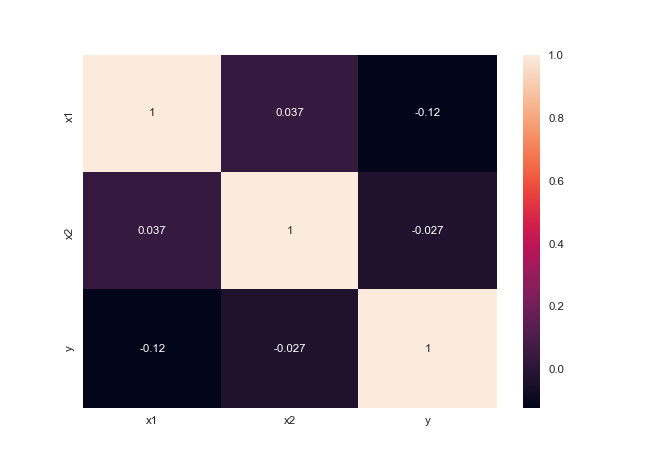

In [9]:
#Correlation bw Features through HeatMap
sns.heatmap(df.corr(), annot = True);

<IPython.core.display.Javascript object>


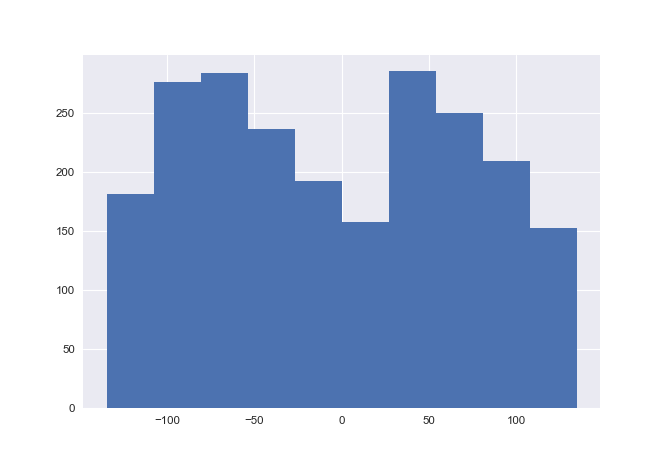

In [11]:
plt.hist(df['x1'])
plt.show()

## Dealing with Missing Values

In [12]:
# Checking for whether Null values exist in df column wise
df.isnull().any()

x1     True
x2     True
y     False
dtype: bool

In [13]:
# Count of Null values column wise
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [14]:
# Very less fraction of values are null in df ,hence we can drop them

In [15]:
df.dropna(inplace=True)

In [16]:
# Null values are dropped
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

In [17]:
df.shape

(2219, 3)

## Feature Engineering

In [29]:
# Detecting outliers visually

<IPython.core.display.Javascript object>


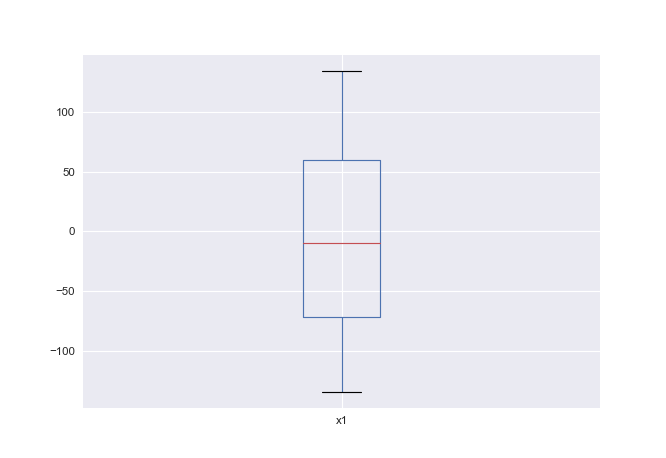

In [18]:
plt.figure()
df.boxplot(column = 'x1')
plt.show()

<IPython.core.display.Javascript object>


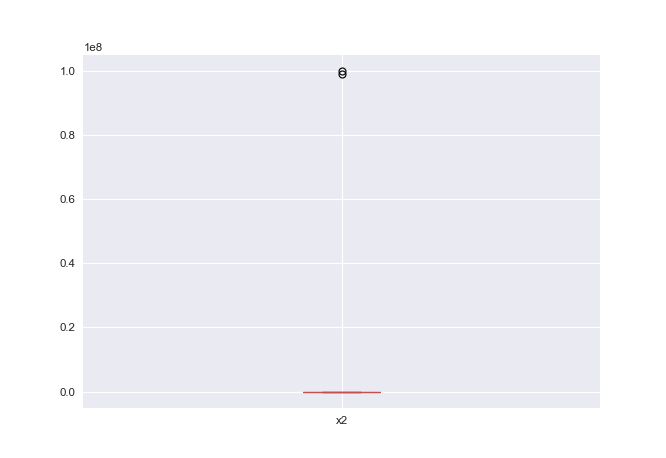

In [19]:
plt.figure()
df.boxplot(column = 'x2')
plt.show()

<IPython.core.display.Javascript object>


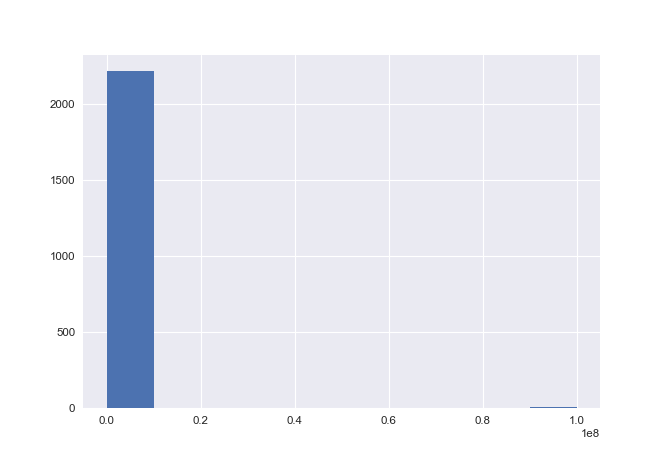

In [21]:
plt.hist(df['x2'])
plt.show()

### Feature Scaling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# X data
X = df.iloc[:,[0,1]]

# Y data
y = df.iloc[:,[2]]

# Scaler Object
scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
#Both fit and transform together
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.51458295,  0.33066435],
       [ 0.51314325,  0.49422411],
       [-0.70871825,  0.83232296],
       ...,
       [-0.31182675,  0.36731374],
       [-0.45701582,  0.17529513],
       [-0.58681675, -0.76077846]])

In [24]:
X_test_scaled

array([[ 0.22677971,  0.19181834],
       [-0.54285609,  0.48114833],
       [ 0.79550673,  0.69650611],
       ...,
       [ 0.41886096,  0.1416953 ],
       [-0.55021935, -0.64403655],
       [-0.53181875,  0.57883103]])

## Modelling

#### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=100).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.54
Accuracy of Logistic regression classifier on test set: 0.55


In [26]:
# Parameter Tuning
clf = LogisticRegression(penalty='l2',C=10).fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.54
Accuracy of Logistic regression classifier on test set: 0.55


In [27]:
# Same Result even when hyperparameters are tuned

#### SVM with Linear Kernel

In [114]:
from sklearn.svm import SVC

#this_C is Regularization factor set to 1.00
this_C = 1.0

#Linear kernel
clfS = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)

In [116]:
print('Accuracy of SVM with Linear Kernel classifier on training set: {:.2f}'
     .format(clfS.score(X_train, y_train)))
print('Accuracy of SVM with Linear Kernel classifier on test set: {:.2f}'
     .format(clfS.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.56
Accuracy of Logistic regression classifier on test set: 0.55


#### SVM with Rbf Kernel

In [29]:
from sklearn.svm import SVC

# Rbf Kernel
clfSR = SVC(kernel = 'rbf')

clfSR.fit(X_train, y_train)

print('Accuracy of SVM with RBF Kernel classifier on training set: {:.2f}'
     .format(clfSR.score(X_train, y_train)))
print('Accuracy of SVM with RBF Kernel classifier on test set: {:.2f}'
     .format(clfSR.score(X_test, y_test)))

Accuracy of SVM with RBF Kernel classifier on training set: 1.00
Accuracy of SVM with RBF Kernel classifier on test set: 0.70


In [34]:
# SVM with Rbf model is Overfitting

In [31]:
# HyperParameter tuning with gamma and regularization parameter
for this_gamma in ([0.01, 1.0, 10.0]):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    print('Accuracy of SVM with RBF Kernel classifier on training set with gamma {}: {:.2f}'
     .format(this_gamma , clfSR.score(X_train, y_train)))
    print('Accuracy of SVM with RBF Kernel classifier on test set with gamma {}: {:.2f}'
     .format(this_gamma, clfSR.score(X_test, y_test)))
    print('\n')

Accuracy of SVM with RBF Kernel classifier on training set with gamma 0.01: 1.00
Accuracy of SVM with RBF Kernel classifier on test set with gamma 0.01: 0.70


Accuracy of SVM with RBF Kernel classifier on training set with gamma 1.0: 1.00
Accuracy of SVM with RBF Kernel classifier on test set with gamma 1.0: 0.70


Accuracy of SVM with RBF Kernel classifier on training set with gamma 10.0: 1.00
Accuracy of SVM with RBF Kernel classifier on test set with gamma 10.0: 0.70




In [ ]:
# Same result even when Parameters are tuned

#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

clfD = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfD.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfD.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


In [ ]:
# Decision tree model is Overfitting

In [35]:
# Hyperparameter tuning setting max_depth parameter
clfD = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfD.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfD.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.95


#### K-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier  

classifier= KNeighborsClassifier(n_neighbors=5)  

classifier.fit(X_train, y_train) 

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.97
Accuracy of KNN classifier on test set: 0.94


In [37]:
# HyperParameter Tuning
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)

classifier.fit(X_train, y_train) 

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

Accuracy of KNN classifier on training set: 0.97
Accuracy of KNN classifier on test set: 0.95


## Conclusion

- Hence we can conclude that Decision Tree and K-Nearest Neighbours are the ones with highest and equal accuracy score on test set.(95%)
<br>

- SVM with rbf kernel is overfitting the data and producing same results even when parameters are tuned.
<br>

- Decision Tree tends to overfit the data but with correct parameters it can be tuned and produce better results
<br>

- Worst Performance is given by Logistic Regression Classifier & SVM with Linear Kernel ,both of which gives an accuracy of 0.55 on training set and test set as well.